## Aprovehcamiento de la información

Para descargar librería elimine el signo de "#" y corra la linea,
Esto es necesario sólo la primera vez que se utiliza en esta computadora
para los comandos que comienzan con pip.

In [ ]:
#pip install pandas

In [ ]:
#pip install numpy

In [ ]:
#pip install sweetviz

In [14]:
# cagramos librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#Cargo base de datos desde el repositorio
#Cambia la ruta para que cargue la base de datos que guardaste la sesión
datos = pd.read_csv("https://raw.githubusercontent.com/CristinaA-Venzor/CURSO_BASE_ANALISIS_CRIMINAL/main/Bases%20de%20datos/FGJ.csv")
#Muestro las 5 primeras filas
datos.head()

,Unnamed: 0,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,...,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,alcaldia_hechos,municipio_hechos,colonia_datos,fgj_colonia_registro,latitud,longitud
0,1,8828667,2021,Enero,2021-01-01,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,59.0,FISICA,...,Diciembre,2020-12-31,22:00:00,00:02:21,LA MAGDALENA CONTRERAS,NaN,LA CRUZ,LA CRUZ,19.309708,-99.234309
1,2,8828674,2021,Enero,2021-01-01,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,NaN,FISICA,...,Enero,2021-01-01,00:15:00,00:57:55,MILPA ALTA,NaN,VILLA MILPA ALTA (PBLO),SANTA MARTHA (VILLA MILPA ALTA),19.198153,-99.026277
2,3,8828679,2021,Enero,2021-01-01,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,31.0,FISICA,...,Enero,2021-01-01,00:55:00,01:28:32,MILPA ALTA,NaN,SAN SALVADOR CUAUHTENCO (PBLO),SAN SALVADOR CUAUHTENCO SECCION III,19.193027,-99.095006
3,4,8828694,2021,Enero,2021-01-01,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,44.0,FISICA,...,Enero,2021-01-01,01:45:00,06:03:38,COYOACAN,NaN,LOS REYES (PBLO),PUEBLO DE LOS REYES,19.336963,-99.152265
4,5,8828698,2021,Enero,2021-01-01,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,27.0,FISICA,...,Enero,2021-01-01,06:00:00,07:27:16,GUSTAVO A. MADERO,NaN,LUIS DONALDO COLOSIO,LUIS DONALDO COLOSIO,19.561525,-99.146590


In [26]:
# Convertir la columna de fechas al formato datetime
datos['FechaHecho'] = pd.to_datetime(datos['FechaHecho'])

In [27]:
# Extraer los meses y almacenarlos en una nueva columna
datos['meses_hecho'] = datos['FechaHecho'].dt.strftime('%B')
datos['meses_hecho'] 

0        December
1         January
2         January
3         January
4         January
           ...   
77187    December
77188    December
77189     October
77190    December
77191    December
Name: meses_hecho, Length: 77192, dtype: object

In [28]:
# para cambiar nombre de los meses a español
# Crear un diccionario de mapeo de nombres de meses en inglés a español
mapeo_meses = {
    'January': 'Enero',
    'February': 'Febrero',
    'March': 'Marzo',
    'April': 'Abril',
    'May': 'Mayo',
    'June': 'Junio',
    'July': 'Julio',
    'August': 'Agosto',
    'September': 'Sept.',
    'October': 'Octubre',
    'November': 'Nov.',
    'December': 'Dic.'
}

# Aplicar la traducción al español
datos['meses_hecho'] = datos['meses_hecho'].map(mapeo_meses)
datos['meses_hecho'] 

0           Dic.
1          Enero
2          Enero
3          Enero
4          Enero
          ...   
77187       Dic.
77188       Dic.
77189    Octubre
77190       Dic.
77191       Dic.
Name: meses_hecho, Length: 77192, dtype: object

In [35]:
# Crear una tabla de frecuencias de los meses
tabla_frecuencias = datos['meses_hecho'].value_counts().reset_index()
tabla_frecuencias.columns = ['Mes', 'Frecuencia']
tabla_frecuencias

,Mes,Frecuencia
0,Mayo,7415
1,Marzo,7045
2,Octubre,6817
3,Abril,6792
4,Agosto,6482
5,Junio,6434
6,Julio,6430
7,Nov.,6352
8,Sept.,6149
9,Dic.,5962


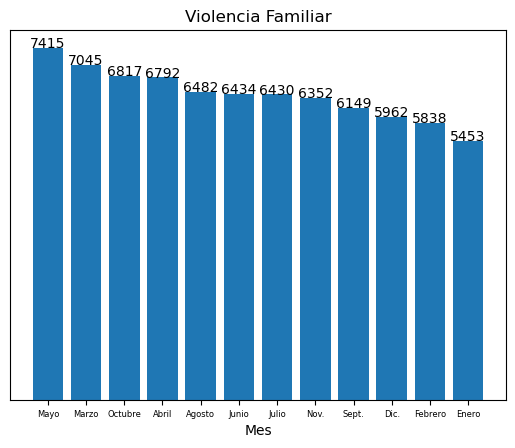

In [36]:
# Generar la gráfica de barras con etiquetas
plt.bar(tabla_frecuencias['Mes'], tabla_frecuencias['Frecuencia'])

# Añadir etiquetas a las barras
for i, frecuencia in enumerate(tabla_frecuencias['Frecuencia']):
    plt.text(i, frecuencia + 0.1, str(frecuencia), ha='center')
    
# Ajustar el tamaño de la letra del eje x
plt.xticks(fontsize=6)

# Configurar el título y las etiquetas del eje
plt.title('Violencia Familiar')
plt.xlabel('Mes')

# Quitar el eje y
plt.gca().get_yaxis().set_visible(False)

#Guardar el gráfico
plt.savefig('grafica_mes.png', bbox_inches='tight')
plt.show()

In [32]:
# Crear una tabla de frecuencias de los meses
tabla_frecuencias = datos['Sexo'].value_counts().reset_index()
tabla_frecuencias.columns = ['Sexo', 'Frecuencia']
tabla_frecuencias

,Sexo,Frecuencia
0,Femenino,56858
1,Masculino,20090


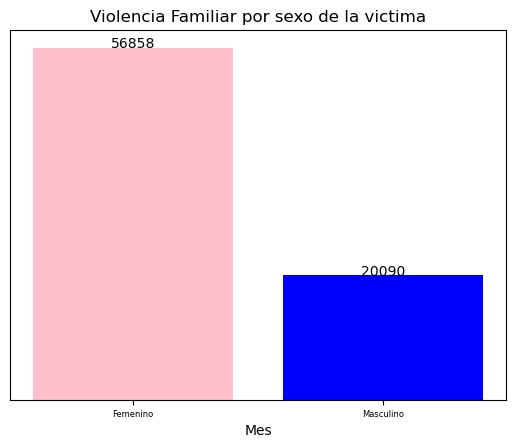

In [34]:
# Generar la gráfica de barras con etiquetas
color = ("pink", "blue")
plt.bar(tabla_frecuencias['Sexo'], tabla_frecuencias['Frecuencia'], color = color)

# Añadir etiquetas a las barras
for i, frecuencia in enumerate(tabla_frecuencias['Frecuencia']):
    plt.text(i, frecuencia + 0.1, str(frecuencia), ha='center')
    
# Ajustar el tamaño de la letra del eje x
plt.xticks(fontsize=6)

# Configurar el título y las etiquetas del eje
plt.title('Violencia Familiar por sexo de la victima')
plt.xlabel('Mes')

# Quitar el eje y
plt.gca().get_yaxis().set_visible(False)

#Guardar el gráfico
plt.savefig('grafica_sexo.png', bbox_inches='tight')
plt.show()